1. Analizzare i dati a vostra disposizione e correggere eventuali errori presenti nell'insieme di dati 
(dati mancanti, dati palesemente errati, etc...) 
2. Individuare quali sono gli attributi che sembrano maggiormente correlati alla variabile target 
3. Costruire almeno un paio di modelli previsivi, appartenenti a tipologie diverse (ad esempio alberi 
di classificazione e classificatori a regole) 
4. Studiare l'accuratezza dei modelli ottenuti 

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('dataset csv\PS_20174392719_1491204439457_log.csv')

dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
import matplotlib.pyplot as plt


In [6]:
def plot_attributes(data):
    plt.figure()
    dataset.boxplot(data)
    plt.show()

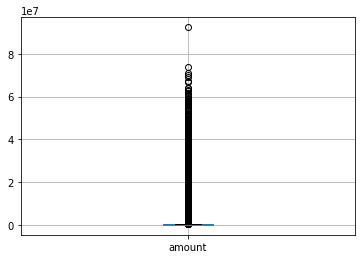

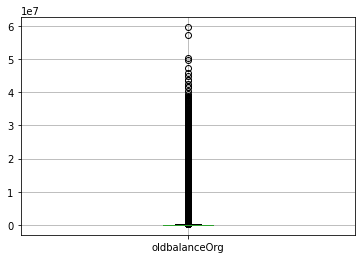

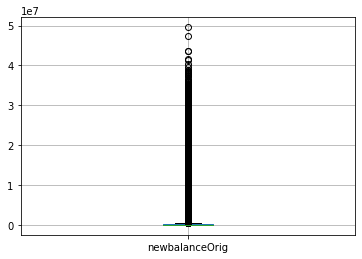

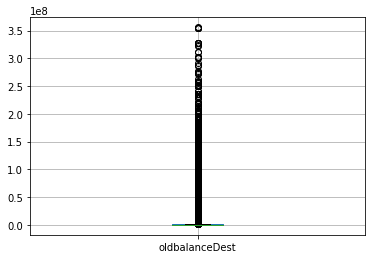

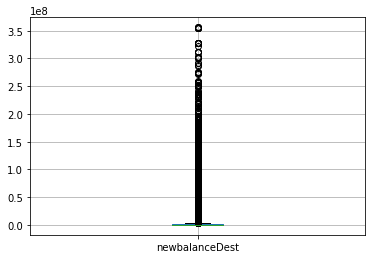

In [7]:
for col in dataset.select_dtypes(include=['float64']):
    plot_attributes(col)

In [8]:
for col in dataset.select_dtypes(include=['float64']):
    print(col)
    print(dataset[col].describe())
    print()

amount
count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

oldbalanceOrg
count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

newbalanceOrig
count    6.362620e+06
mean     8.551137e+05
std      2.924049e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.442584e+05
max      4.958504e+07
Name: newbalanceOrig, dtype: float64

oldbalanceDest
count    6.362620e+06
mean     1.100702e+06
std      3.399180e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.327057e+05
75%      9.430367e+05
max      3.560159e+08
Name: oldbalanceDest, dtype: float64

newbalanceDest
count    6.362620e+06
mean     1.224996e+06
std      3.674129e+06
min      0.000000e+00

In [9]:
dataset.drop(dataset[dataset['amount'] > 65000000].index, inplace=True)
print('amount')
print(dataset.shape)

dataset.drop(dataset[dataset['oldbalanceOrg'] > 42000000].index, inplace=True)
print('oldbalanceOrg')
print(dataset.shape)

dataset.drop(dataset[dataset['newbalanceOrig'] > 40000000].index, inplace=True)
print('newbalanceOrig')
print(dataset.shape)

dataset.drop(dataset[dataset['oldbalanceDest'] > 300000000].index, inplace=True)
print('oldbalanceDest')
print(dataset.shape)

dataset.drop(dataset[dataset['newbalanceDest'] > 300000000].index, inplace=True)
print('newbalanceDest')
print(dataset.shape)

amount
(6362613, 11)
oldbalanceOrg
(6362603, 11)
newbalanceOrig
(6362601, 11)
oldbalanceDest
(6362582, 11)
newbalanceDest
(6362576, 11)


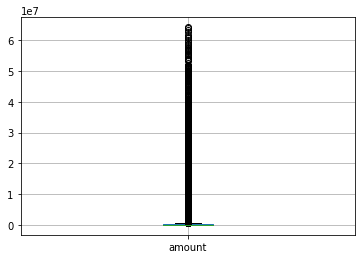

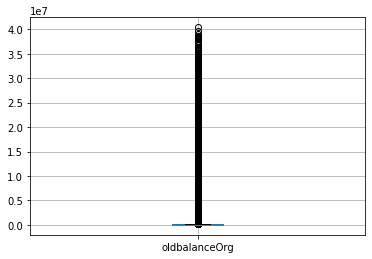

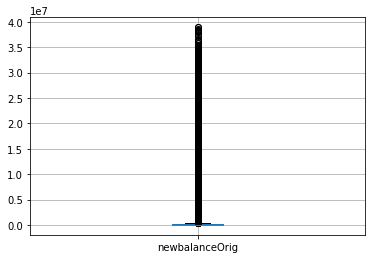

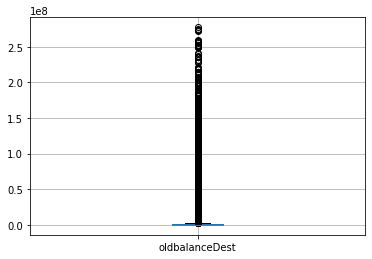

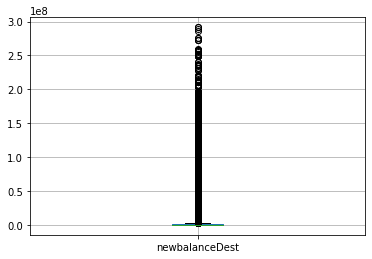

In [10]:
for col in dataset.select_dtypes(include=['float64']):
    plot_attributes(col)

In [11]:
dataset.drop("nameOrig", axis = 1, inplace=True)
dataset.drop("nameDest", axis = 1, inplace=True)
dataset.drop("isFlaggedFraud", axis = 1, inplace=True)

dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [12]:
from sklearn.preprocessing import LabelEncoder

# Handling categoric data
newdata = dict()
for key in dataset.keys():
    if dataset[key].dtypes == 'object':
        le = LabelEncoder()
        le.fit(dataset[key])
        newdata[key] = le.transform(dataset[key])
    else:
        newdata[key] = dataset[key]

dataset.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [13]:
new_ds = pd.DataFrame.from_dict(newdata, orient='columns', dtype=None)

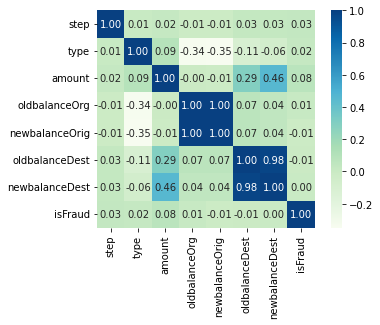

In [14]:
import seaborn as sns

# correlation matrix
mc = new_ds.corr()
sns.heatmap(mc, annot=True, vmax=1, square=True, fmt='.2f', cmap='GnBu', robust=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split


X = new_ds.iloc[:, :-1]
y = new_ds.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_new_train, y_train = oversample.fit_resample(X_train, y_train)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

gnb = GaussianNB()
logreg = LogisticRegression(solver="lbfgs")
kneig = KNeighborsClassifier(3)
randfor = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
dectree = DecisionTreeClassifier(max_depth=5)

ensemble_classifier = VotingClassifier(
    estimators=[('gnb', gnb), ('logreg', logreg), ('kneig', kneig), ("randfor", randfor), ("dectree", dectree)],
    voting='hard'
)

# Fit the ensemble regressor
ensemble_classifier.fit(X_new_train, y_train)

# Predict with the ensemble regressor
y_pred = ensemble_classifier.predict(X_test)

c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\guido\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

def metrics_scores(clf):
    print(accuracy_score(y_test, y_pred))
    print("Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
    pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=1)
    print(clf, ': Accuracy score: ', round(accuracy_score(y_test, y_pred), 4), "Precision",
                round(pr, 4), ' Recall ', round(rc, 4), ' FScore ', round(fs, 4))
    cmatrix = confusion_matrix(y_test, y_pred)
    print(cmatrix)
    report = classification_report(y_pred, y_test, zero_division=1)
    print(report)
    print()

In [19]:
classifiers = ensemble_classifier.named_estimators_

# Print the individual classifiers
for name, classifier in classifiers.items():
    print(f"Classifier Name: {name}")
    metrics_scores(classifier)
    print("---------------------------------")

Classifier Name: gnb
0.9878702181977637
Accuracy: 0.99
GaussianNB() : Accuracy score:  0.9879 Precision 0.5456  Recall  0.9629  FScore  0.5801
[[1883311   23000]
 [    153    2309]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1883464
           1       0.94      0.09      0.17     25309

    accuracy                           0.99   1908773
   macro avg       0.96      0.55      0.58   1908773
weighted avg       0.99      0.99      0.98   1908773


---------------------------------
Classifier Name: logreg
0.9878702181977637
Accuracy: 0.99
LogisticRegression() : Accuracy score:  0.9879 Precision 0.5456  Recall  0.9629  FScore  0.5801
[[1883311   23000]
 [    153    2309]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1883464
           1       0.94      0.09      0.17     25309

    accuracy                           0.99   1908773
   macro avg       0.96      0.55      0.58  

In [20]:
metrics_scores(ensemble_classifier)

0.9878702181977637
Accuracy: 0.99
VotingClassifier(estimators=[('gnb', GaussianNB()),
                             ('logreg', LogisticRegression()),
                             ('kneig', KNeighborsClassifier(n_neighbors=3)),
                             ('randfor',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=1,
                                                     n_estimators=10)),
                             ('dectree', DecisionTreeClassifier(max_depth=5))]) : Accuracy score:  0.9879 Precision 0.5456  Recall  0.9629  FScore  0.5801
[[1883311   23000]
 [    153    2309]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1883464
           1       0.94      0.09      0.17     25309

    accuracy                           0.99   1908773
   macro avg       0.96      0.55      0.58   1908773
weighted avg       0.99      0.99      0.98   1908773




In [21]:
from sklearn.model_selection import KFold, cross_validate

def k_folds(clf):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scoring = ['accuracy', 'precision', 'recall']
    results = cross_validate(clf,X,y,scoring=scoring,cv=cv, n_jobs=-1)
    print("Accuracy: {:.4f}".format(results['test_accuracy'].mean()))
    print("Recall: {:.4f}".format(results['test_recall'].mean()))
    print("Precision: {:.4f}".format(results['test_precision'].mean()))

In [22]:
classifiers = ensemble_classifier.named_estimators_

# Print the individual classifiers
for name, classifier in classifiers.items():
    print(f"Classifier Name: {name}")
    k_folds(classifier)
    print("---------------------------------")

Classifier Name: gnb
Accuracy: 0.9935
Recall: 0.1727
Precision: 0.0401
---------------------------------
Classifier Name: logreg
Accuracy: 0.9983
Recall: 0.4488
Precision: 0.3742
---------------------------------
Classifier Name: kneig
Accuracy: 0.9994
Recall: 0.7047
Precision: 0.8399
---------------------------------
Classifier Name: randfor
Accuracy: 0.9990
Recall: 0.2483
Precision: 0.9996
---------------------------------
Classifier Name: dectree
Accuracy: 0.9994
Recall: 0.6290
Precision: 0.8974
---------------------------------


In [23]:
k_folds(ensemble_classifier)

Accuracy: 0.9993
Recall: 0.4251
Precision: 0.9974
